# Flight Fare Prediction Model

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Training Dataset

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')

In [3]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Handling Missing Values

In [4]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Preprocessing

### Changing Date Related Features to Datetime

In [8]:
df_train_copy = df_train.copy()

In [9]:
## datatype conversion: object -> datetime
def change_to_datetime(col):
    df_train_copy[col] = pd.to_datetime(df_train_copy[col])

In [10]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
## applying function to each feature
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_to_datetime(feature)

In [12]:
df_train_copy.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
## extracting day, month, and year
df_train_copy['Day_of_Journey'] = df_train_copy['Date_of_Journey'].dt.day
df_train_copy['Month_of_Journey'] = df_train_copy['Date_of_Journey'].dt.month
df_train_copy['Year_of_Journey'] = df_train_copy['Date_of_Journey'].dt.year

In [14]:
df_train_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-16 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-12-16 05:50:00,2025-12-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-12-16 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-12-16 18:05:00,2025-12-16 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-12-16 16:50:00,2025-12-16 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


### Cleaning Dep_Time and Arrival_Time

In [15]:
## extracting dep and arrival time
def extract_hrs_mins(df, col):
    df[col+'_Hours'] = df[col].dt.hour
    df[col+'_Minutes'] = df[col].dt.minute

In [16]:
extract_hrs_mins(df_train_copy, "Dep_Time")
extract_hrs_mins(df_train_copy, "Arrival_Time")

In [17]:
df_train_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-16 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-12-16 05:50:00,2025-12-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-12-16 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-12-16 18:05:00,2025-12-16 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-12-16 16:50:00,2025-12-16 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [18]:
## dropping Dep_Time and Arrival_Time
df_train_copy.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [19]:
print(df_train_copy.columns)
df_train_copy.shape

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Year_of_Journey', 'Dep_Time_Hours',
       'Dep_Time_Minutes', 'Arrival_Time_Hours', 'Arrival_Time_Minutes'],
      dtype='object')


(10682, 16)

## Some Data Analysis and Plot

### Analyzing when most flights take off according to the time of day

In [20]:
## converting dep time to time of day
def dep_time(hour):
    if (hour > 4) and (hour <= 8):
        return "Early Morning"
    elif (hour > 8) and (hour <= 12):
        return "Morning"
    elif (hour > 12) and (hour <= 16):
        return "Noon/Afternoon"
    elif (hour > 16) and (hour <= 20):
        return "Evening"
    elif (hour > 20) and (hour <= 24):
        return "Night"
    else:
        return "Late Night"

In [21]:
df_train_copy['Dep_Time_Hours'].apply(dep_time).value_counts()

Dep_Time_Hours
Early Morning     2880
Evening           2357
Morning           2209
Noon/Afternoon    1731
Night             1040
Late Night         465
Name: count, dtype: int64

In [22]:
import plotly.express as px

In [23]:
## converting value counts into df for iplot
vc_df = df_train_copy['Dep_Time_Hours'].apply(dep_time).value_counts().reset_index() 
vc_df.columns = ['Dep_Time', 'Count']
fig = px.bar(vc_df, 
             x='Dep_Time', 
             y='Count', 
             title='Departure Time Distribution', 
             color_discrete_sequence=['#2ca02c'])
fig.update_xaxes(title_text='Departure Time Category')
fig.update_yaxes(title_text='Number of Flights Take Off')
fig.update_layout(
    title={
        'text': 'Departure Time Distribution',
        'x': 0.5,        # center
        'xanchor': 'center',
        'font': {
            'size': 20,
            'family': 'Arial',
            'color': 'black'
        }
    }
)
fig.show()

## Processing Flight Duration Feature

In [24]:
## preprocessing duration 
## e.g. 50m -> 0h 50m
## e.g. 19h -> 19h 0m
def preprocess_duration(feature):
    if 'h' not in feature:
        feature = '0h' + ' ' + feature
    elif 'm' not in feature:
        feature = feature + ' ' + '0m'
    return feature

In [25]:
df_train_copy['Duration'] = df_train_copy['Duration'].apply(preprocess_duration)

In [26]:
df_train_copy['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [27]:
## extracting hour and min from duration
## e.g. 2h 50m -> split at ' ' and get index 0 for hour and index 1 for min

## hour
df_train_copy['Duration_Hours'] = df_train_copy['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
df_train_copy['Duration_Minutes'] = df_train_copy['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [28]:
df_train_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


## Relation Analyzing: Duration vs Flight Price

In [29]:
## converting duration into total minutes
df_train_copy['Duration_Total_Minutes'] = df_train_copy['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [30]:
df_train_copy['Duration_Total_Minutes']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Total_Minutes, Length: 10682, dtype: int64

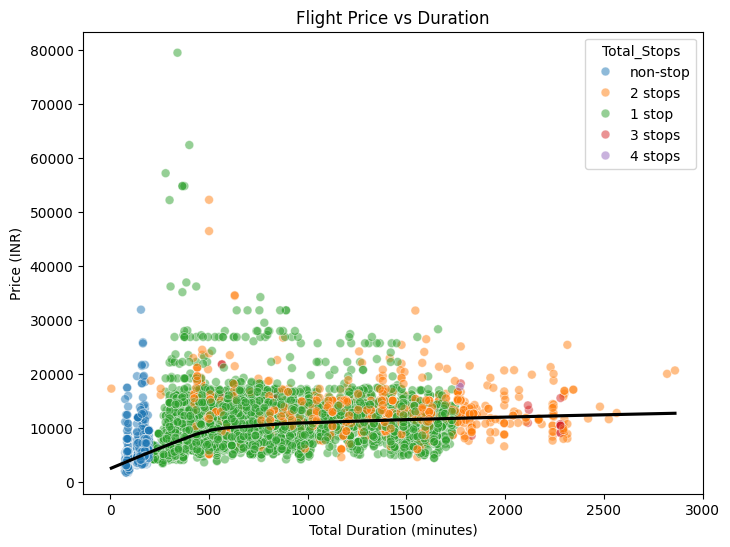

In [31]:
## scatter plot with trend
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration_Total_Minutes', 
                y='Price', 
                data=df_train_copy,
                hue='Total_Stops',
                alpha=0.5,
                s=40)
sns.regplot(
    x='Duration_Total_Minutes',
    y='Price',
    data=df_train_copy,
    scatter=False,
    color='black',
    lowess=True
)
plt.title('Flight Price vs Duration')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Price (INR)')
plt.show()

## Extracting Jet Airway's Most Utilized Flight Route

In [32]:
## extracting jet airways data
df_train_copy[df_train_copy['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hours,Duration_Minutes,Duration_Total_Minutes
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,24,45,1485


In [33]:
## grouping by the route Jet Aiways operates
df_train_copy[df_train_copy['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Hence, the top routes that Jet Airways has most number of flights

## Analyzing if Flight Price Depends on Airline

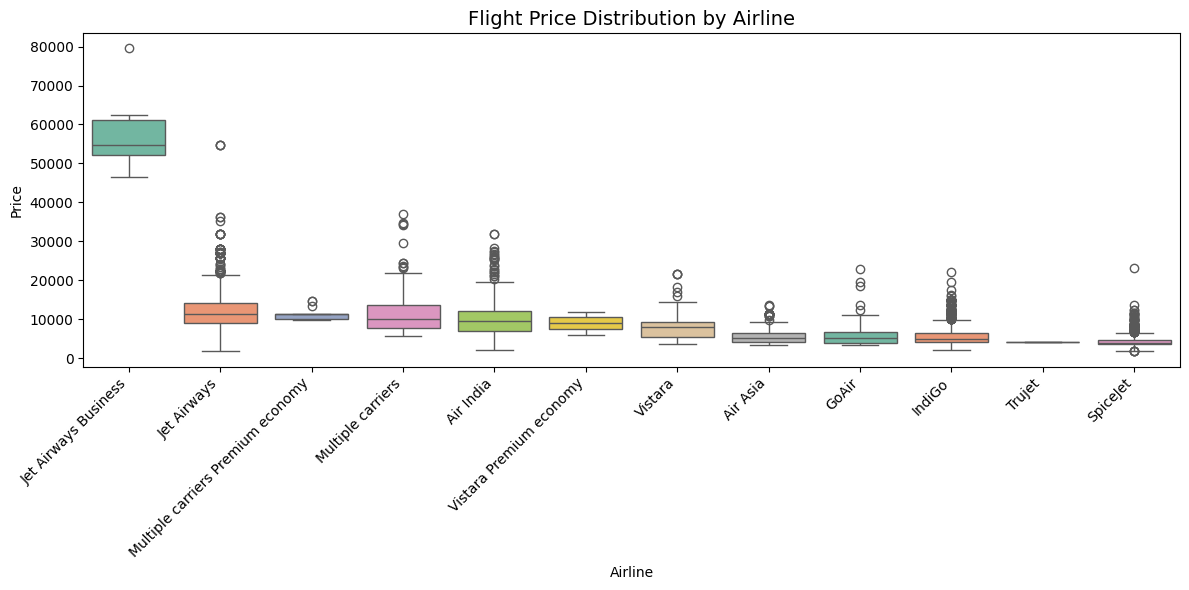

In [34]:
## finding the price distribution on basis of airlines using box plot
## sorting the df according to median Price 

order = (
    df_train_copy
    .groupby('Airline')['Price']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', 
            y='Price', 
            data=df_train_copy,
            order=order,
            palette='Set2')

plt.title('Flight Price Distribution by Airline', fontsize=14)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hence, Jet Airways Business seems to have the highest median price, extremely greater than any other. Other than that, almost all other airlines have similar median. The graph goes from left to right according to decreasing median prices. 

## Feature Engineering

#### Applying One Hot Encoding on Source Feature

In [35]:
## extracting the sources (places where flights take off)
df_train_copy['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [36]:
## applying one hot encoding from scratch
for sub_category in df_train_copy['Source'].unique():
    df_train_copy['Source_'+sub_category] = df_train_copy['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [37]:
## alternate one hot encoding

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(
#     sparse_output=False,  ## return numpy array
#     drop=None             ## keeping all categories
# )

# source_encoded = ohe.fit_transform(df_train_copy[['Source']])

# ## converting back into a df
# source_df = pd.DataFrame(
#     source_encoded,
#     columns=ohe.get_feature_names_out(['Source']),
#     index=df_train_copy.index
# )

# ## joining the two df
# df_train_copy = pd.concat([df_train_copy, source_df], axis=1)

In [39]:
df_train_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
